In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

In [2]:
X=np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11],[8,2],[10,2],[9,3]])

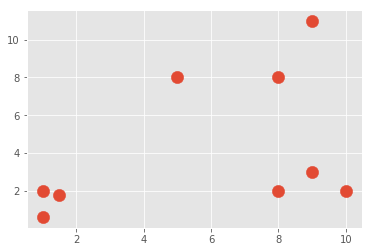

In [3]:
plt.scatter(X[:,0],X[:,1],s=150)
plt.show()
colors=10*["g","r","c","b","k"]

In [4]:
class Mean_Shift:
    def __init__(self,radius=5):
        self.radius=radius
    def fit(self,data):
        centroids={}
        for i in range(len(data)):
            centroids[i]=data[i]
        while True:
            new_centroids=[]
            for i in centroids:
                print("------",centroids)
                in_bandwidth=[]
                centroid=centroids[i]
                print("------------",centroid)
                for featureset in data:
                    if(np.linalg.norm(featureset-centroid)<self.radius):
                        in_bandwidth.append(featureset)
                new_centroid=np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))
            print("------C-------",new_centroids)
            uniques=sorted(list(set(new_centroids)))
            print("---------U-------",uniques)
            prev_centroids=dict(centroids)
            centroids={}
            for i in range(len(uniques)):
                centroids[i]=np.array(uniques[i])
            optimized=True
            for i in centroids:
                if(np.array_equal(centroids[i],prev_centroids[i]))!=True:
                    optimized=False
                if optimized!=True:
                    break
            if optimized:
                break
        self.centroids=centroids

In [5]:
clf=Mean_Shift(radius=5)
clf.fit(X)

------ {0: array([1., 2.]), 1: array([1.5, 1.8]), 2: array([5., 8.]), 3: array([8., 8.]), 4: array([1. , 0.6]), 5: array([ 9., 11.]), 6: array([8., 2.]), 7: array([10.,  2.]), 8: array([9., 3.])}
------------ [1. 2.]
------ {0: array([1., 2.]), 1: array([1.5, 1.8]), 2: array([5., 8.]), 3: array([8., 8.]), 4: array([1. , 0.6]), 5: array([ 9., 11.]), 6: array([8., 2.]), 7: array([10.,  2.]), 8: array([9., 3.])}
------------ [1.5 1.8]
------ {0: array([1., 2.]), 1: array([1.5, 1.8]), 2: array([5., 8.]), 3: array([8., 8.]), 4: array([1. , 0.6]), 5: array([ 9., 11.]), 6: array([8., 2.]), 7: array([10.,  2.]), 8: array([9., 3.])}
------------ [5. 8.]
------ {0: array([1., 2.]), 1: array([1.5, 1.8]), 2: array([5., 8.]), 3: array([8., 8.]), 4: array([1. , 0.6]), 5: array([ 9., 11.]), 6: array([8., 2.]), 7: array([10.,  2.]), 8: array([9., 3.])}
------------ [8. 8.]
------ {0: array([1., 2.]), 1: array([1.5, 1.8]), 2: array([5., 8.]), 3: array([8., 8.]), 4: array([1. , 0.6]), 5: array([ 9., 11.

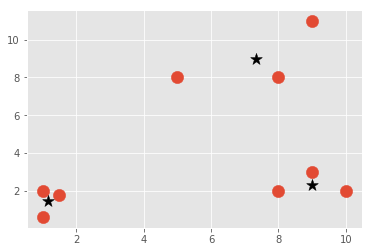

In [6]:
centroids=clf.centroids
plt.scatter(X[:,0],X[:,1],s=150)
for c in centroids:
    plt.scatter(centroids[c][0],centroids[c][1],color='k',marker='*',s=150)
plt.show()

In [11]:
labels=[]
def check(data):
    centroids=clf.centroids
    distances=[np.linalg.norm(data-centroids[centroid])for centroid in centroids]
    classification=distances.index(min(distances))
    labels.append(classification)

In [12]:
for data in X:
    check(data)
print(labels)

[0, 0, 1, 1, 0, 1, 2, 2, 2]


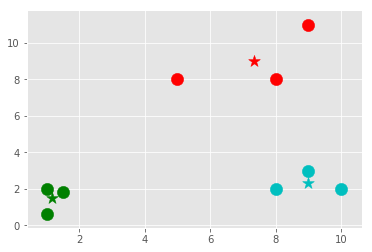

In [13]:
centroids=clf.centroids
uniq=set(labels)
for i in range(len(X)):
    plt.scatter(X[i][0],X[i][1],s=150,color=colors[labels[i]])
for c in centroids:
    plt.scatter(centroids[c][0],centroids[c][1],color=colors[c],marker="*",s=150)
plt.show()